
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project uses TMDb data set which contains information about 10,000 movies, including user ratings and revenue. The data set includes various information about each movie: popularity, budget, revenue, genre, keywords, taglines,runtime,vote counts, vote average, movie release date, cast, among other variables.


### Questions for Analysis
This project focuses on finding out which factors result to higher movie revenue after production and release. I will be working to determine relationship between movie rating(vote_average), runtime, popularity, and movie revenue. From this, I will investigate the effect of length of runtime in maximizing movie revenue.


In [33]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [34]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 3.4MB/s eta 0:00:01    44% |██████████████▏                 | 4.2MB 16.7MB/s eta 0:00:01    76% |████████████████████████▋       | 7.3MB 22.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01  9% |███                             | 1.3MB 23.1MB/s eta 0:00:01    17% |█████▋                          | 2.3MB 21.9MB/s eta 0:00:01    25% |████████▏                       | 3.4MB 21.5MB/s eta 0:00:01    33% |██████████▉                     | 4.5MB 23.9MB/s eta 0:00:01    41% |█████████████▎                  | 5.6MB 23.0MB/s eta 0:00:01    49% |███████████████▉                | 6.6MB 18.4MB/s eta 0:00:01    65% |█████████████████████           | 8.8MB 22.7MB/s eta 0:00:01    72% |███████████████████████▏        | 9.7MB 22.6MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 17.2MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existi

<a id='wrangling'></a>
## Data Wrangling

This section of the report entails loading in the data, checking for cleanliness, and then trimming and cleaning the dataset for analysis. 


In [39]:
#Loading TMDb data set
df=pd.read_csv("TMDb_movies1.csv")
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [40]:
# number of rows and columns
df.shape

(10866, 21)

In [6]:
#summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
In this section, I will be cleaning data to check null entries, remove duplicates and drop the extra columns that are not necessary for this analysis.


In [42]:
# Dropping unnecessary columns
df=df.drop(['id','imdb_id','homepage','director','cast','release_date','tagline','keywords','overview','genres','production_companies','release_year'], axis=1,errors='ignore')
df.head(2)    


,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,137999939.3,3.481613e+08


In [43]:
#checking for null entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 764.1+ KB


The data set therefore has no null entries.

In [44]:
#checking for duplicates
sum(df.duplicated())

1

In [46]:
#droping duplicates
df.drop_duplicates(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
vote_count        10865 non-null int64
vote_average      10865 non-null float64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 848.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: What is the relationship between a movies' runtime, popularity, budget, voter rating and the revenue received?

In this question, I will determine if there exists a relationship between the runtime, popularity, and voter rating and the revenue collected once the movie is produced. First, I will generate scatter plots to determine the strength or existence of relationships between each variables with revenue.


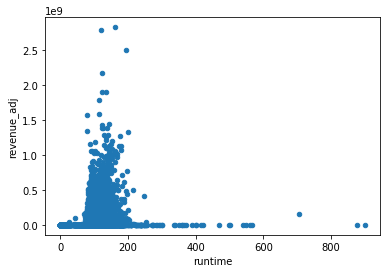

In [11]:
#scatter plot runtime and revenue
df.plot(x="runtime",y="revenue_adj",kind="scatter");

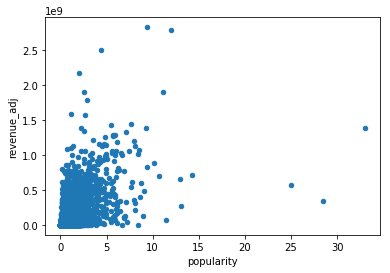

In [20]:
#scatter plot of popularity and revenue
df.plot(x="popularity",y="revenue_adj",kind="scatter");

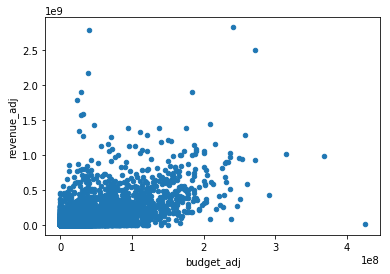

In [21]:
#scatter plot of adjusted budget and revenue
df.plot(x="budget_adj",y="revenue_adj",kind="scatter");

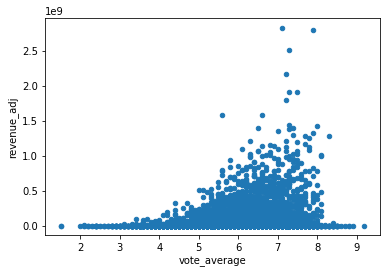

In [22]:
#scatter plot of vote rating and revenue
df.plot(x="vote_average",y="revenue_adj",kind="scatter");

From the scatter plots, it is clear that there exists a weak but positive relationship between voter rating, budget, popularity, and the revenue generated. This means that an increase in a movies' production budget, popularity, and voter rating leads to an increase in the revenue generated.

There also appears to be no correlation  between runtime and the revenue collected.Therefore, for the next question, I am going to investigate how the length of a movie(runtime) affects its revenue.



### Question 2: Do movies with longer or shorter runtime receive higher revenues?

Here, I am going to group the data in two, the movies with longer runtime and those with shorter runtime. Next, to answer the question, I will compute the mean adjusted revenue from each group and compare to see which is higher.


In [12]:
#Computing the median of runtime in the data set.
df['runtime'].median()


99.0

The median is 99. To group the data, the entries with runtime lower than 99 will be categorized as "shorter", whereas those with runtime greater than or equal to 99 will be categorized as "longer".

In [14]:
#using query() to group the data. 
shorter_movies = df.query('runtime < 99')
longer_movies = df.query('runtime >= 99')

In [21]:
#ensuring that the queries included each sample exactly once.
samples = df.shape[0]
samples == shorter_movies['revenue_adj'].count() + longer_movies['revenue_adj'].count()

True

In [24]:
#computing the mean adjusted revenue for shorter movies.
mean_revenue_shorter_movies = shorter_movies.revenue_adj.mean()
mean_revenue_shorter_movies

23596523.853464052

In [25]:
#computing the mean adjusted revenue for longer movies.
mean_revenue_longer_movies = longer_movies.revenue_adj.mean()
mean_revenue_longer_movies

78625767.500581652

There mean revenue collected from longer movies (78,625,767.50) is higher than the mean revenue collected from shorter movies (23,596,523.85). This answers our question that longer films generate higher revenue than shorter films.

**Visualizations:
The graph below illustrates the conclusion drawn from the above computations.**


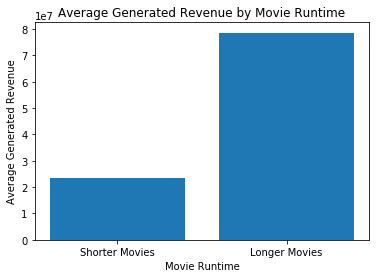

In [31]:
#creating a bar chart

locations = [1,2]
heights = [mean_revenue_shorter_movies,mean_revenue_longer_movies]
labels = ["Shorter Movies","Longer Movies"]
plt.bar(locations, heights, tick_label = labels)
plt.title("Average Generated Revenue by Movie Runtime")
plt.xlabel("Movie Runtime")
plt.ylabel("Average Generated Revenue");

This bar graph illustrates the conclusion that shorter runtime movies receive lower revenue than the longer ones.

<a id='conclusions'></a>
## Conclusions
This research was aimed at investigating the relationship between the length of runtime and revenue collected. It was also seeking to determine the relationship between voter rating, popularity and budget and the revenue received. First, I used scatter plots to test existence of relationship between the variables. There was a weak positive relation between revenue and all the variables except runtime. Therefore, I proceeded further to investigate whether the longer movies or shorter ones lead to higher or lower revenue. 

From the findings, the mean revenue collected from longer films was higher than the average revenue collected from shorter ones. In order to maximize movie revenue, a production film may therefore consider increasing the movie runtime to more than the median, which was 99 in this dataset.

### Limitations
 
There were few limitations encountered in this data analysis. However, the limitations had minor significance to the results obtained in this study. These included: 
1. The data sample was not enough to adequately investigate the relationship  between the variables for the entire movie production population. We only had 10,866 movie entries which were not enough to represent the entire population of movies produced in the last few years to date. 
2. The data variables did not display strong correlation which may have affected the conclusions drawn from this analysis.


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0